In [ ]:
!pip install tensorflow_text

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/fake reviews dataset___ includes computer generated ones.xlsx")
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model')
# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model.keras')
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 50.9 MB/s eta 0:00:00
Mounted at /content/drive


,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['category'].value_counts()
df['spam']=df['label'].apply(lambda x: 1 if x=='CG' else 0)

In [ ]:
df1 = df[df['category']=='Kindle_Store_5']
df2 = df[df['category']=='Books_5']
df3 = df[df['category']=='Pet_Supplies_5']
df4 = df[df['category']=='Home_and_Kitchen_5']
df5 = df[df['category']=='Sports_and_Outdoors_5']
df6 = df[df['category']=='Electronics_5']

domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']

df=[df1,df2,df3,df4,df5,df6]

print(df1.head(),'\n',df2.head(),'\n',df3.head(),'\n',df4.head(),'\n',df5.head(),'\n',df6.head())

             category  rating label  \
23690  Kindle_Store_5       5    CG   
23691  Kindle_Store_5       5    CG   
23692  Kindle_Store_5       5    CG   
23693  Kindle_Store_5       4    CG   
23694  Kindle_Store_5       5    CG   

                                                   text_  spam  
23690  This book I can't wait for more by this author...     1  
23691  Love this series cant wait for more by this au...     1  
23692  Read the books 2 time reading. The characters ...     1  
23693  very enjoyable. I would recommend this book to...     1  
23694  Great story can't wait for more. The character...     1   
       category  rating label  \
28420  Books_5       5    CG   
28421  Books_5       5    CG   
28422  Books_5       5    CG   
28423  Books_5       5    CG   
28424  Books_5       5    CG   

                                                   text_  spam  
28420  I'm hooked on this writer and will be reading ...     1  
28421  Good book and exactly as described. The cha

In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df1['text_'],df1['spam'], stratify=df1['spam'])
x_train,y_train = df1['text_'],df1['spam']
x_test,y_test = df2['text_'],df2['spam']

print(x_test)
print(x_train)
print(y_test)
print(y_train)

28420    I'm hooked on this writer and will be reading ...
28421    Good book and exactly as described. The charac...
28422    Fitting that the ultimate survivor of an epide...
28423    Absolutely loved every word!  We have the book...
28424    I loved it! It was a real, believable, and eng...
                               ...                        
32785    INVENTING GEORGE WASHINGTON:  AMERICA'S FOUNDE...
32786    "Who can find a virtuous woman?"\n\n"When I sa...
32787    Most readers of John Le Carre know him for his...
32788    Not going to lie, I was a little disappointed....
32789    Carlos Ruiz Zafn's novel The Shadow of the Win...
Name: text_, Length: 4370, dtype: object
23690    This book I can't wait for more by this author...
23691    Love this series cant wait for more by this au...
23692    Read the books 2 time reading. The characters ...
23693    very enjoyable. I would recommend this book to...
23694    Great story can't wait for more. The character...
               

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)
domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']

In [ ]:
# model.fit(x_train, y_train, epochs=8)
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)
# model.fit(df1['text_'],df1['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[0]+'.keras')



# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam',
#  loss='binary_crossentropy',
#  metrics=METRICS)

# model.fit(df2['text_'],df2['spam'], epochs=8)



# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[1]+'.keras')

# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam',
#  loss='binary_crossentropy',
#  metrics=METRICS)

# model.fit(df3 ['text_'],df3['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[2]+'.keras')
# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam',
#  loss='binary_crossentropy',
#  metrics=METRICS)
# model.fit(df4 ['text_'],df4['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[3]+'.keras')
# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam',
#  loss='binary_crossentropy',
#  metrics=METRICS)
# model.fit(df5 ['text_'],df5['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[4]+'.keras')
# model = tf.keras.Model(inputs=[text_input], outputs = [l])
# model.compile(optimizer='adam',
#  loss='binary_crossentropy',
#  metrics=METRICS)
# model.fit(df6 ['text_'],df6['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[5]+'.keras')


# y_predicted=[]
# import numpy 
# domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']

# # temp=model.predict(df[0]['text_'])

# # for x in temp:
# #   print(x[0],",")
# # print(temp)
# # y_predicted.append(temp);
# # numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+"Pet_Supplies_5 vs "+domains[0]+'.csv',y_predicted[0] ,delimiter=',')
# for y in range(6):
#   model= tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[y]+'.keras',custom_objects={'KerasLayer':hub.KerasLayer})
#   for x in range(6):
#     temp=model.predict(df[x]['text_'])
#     # for y in temp:
#     #   print(y,",")
#     print(temp)
#     print(x)
#     y_predicted.append(temp);
#     numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[y]+" vs "+domains[x]+'.csv',y_predicted[x] ,delimiter=',')

# # model= tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[2]+'.keras',custom_objects={'KerasLayer':hub.KerasLayer})

Epoch 1/8
133/133 [==============================] - 66s 394ms/step - loss: 0.6923 - accuracy: 0.5393 - precision: 0.5373 - recall: 0.5656
Epoch 2/8
133/133 [==============================] - 48s 363ms/step - loss: 0.6253 - accuracy: 0.6660 - precision: 0.6606 - recall: 0.6827
Epoch 3/8
133/133 [==============================] - 47s 357ms/step - loss: 0.5842 - accuracy: 0.7055 - precision: 0.6999 - recall: 0.7193
Epoch 4/8
133/133 [==============================] - 48s 361ms/step - loss: 0.5572 - accuracy: 0.7280 - precision: 0.7211 - recall: 0.7438
Epoch 5/8
133/133 [==============================] - 48s 357ms/step - loss: 0.5332 - accuracy: 0.7583 - precision: 0.7517 - recall: 0.7715
Epoch 6/8
133/133 [==============================] - 48s 361ms/step - loss: 0.5158 - accuracy: 0.7682 - precision: 0.7660 - recall: 0.7724
Epoch 7/8
133/133 [==============================] - 47s 357ms/step - loss: 0.4991 - accuracy: 0.7755 - precision: 0.7703 - recall: 0.7851
Epoch 8/8
133/133 [========

In [ ]:

# new_model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[0]+'.keras')
import os

import tensorflow as tf
# from tensorflow import keras
domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']

# model= tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[1]+'.keras',custom_objects={'KerasLayer':hub.KerasLayer)
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model.keras', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
# y_predicted=[]
# for x in range(1,6):
#   temp=new_model.predict(df[x]['text_'])
  # y_predicted.append(temp);


 13/137 [=>............................] - ETA: 36s

KeyboardInterrupt: ignored

In [ ]:
import numpy
# y_predicted
# numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+"Books_5 vs "+domains[0]+'.csv',y_predicted[0] ,delimiter=',')

In [ ]:
y_predicted=[]
import numpy 
domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']

# temp=model.predict(df[0]['text_'] )

# for x in temp:
#   print(x[0],",")
# print(temp)
# y_predicted.append(temp);
# numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+"Pet_Supplies_5 vs "+domains[0]+'.csv',y_predicted[0] ,delimiter=',')
for y in range(1,2):
  model= tf.keras.models.load_model('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[y]+'.keras',custom_objects={'KerasLayer':hub.KerasLayer})
  for x in range(6):
    temp=model.predict(df[x]['text_'])
    # for y in temp:
    #   print(y,",")
    # print(temp)
    print(x)
    y_predicted.append(temp);
    numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[y]+" vs "+domains[x]+'.csv',y_predicted[x] ,delimiter=',')

import numpy
# for x in range(1,2):
#   numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv',y_predicted[x-1] ,delimiter=',')
y_predicted=[];
# for x in range(6):
#   y_predicted.append( numpy.genfromtxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv', dtype=float, delimiter=","))
  # numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv',y_predicted[x-1] ,delimiter=',')
y_test=[];
y_test.append(df1['spam'])
y_test.append(df2['spam'])
y_test.append(df3['spam'])
y_test.append(df4['spam'])
y_test.append(df5['spam'])
y_test.append(df6['spam'])

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model__.keras')

# x_train2, x_test2, y_train2, y_test2 = train_test_split(df2['text_'],df2['spam'], stratify=df2['spam'])
# y_predicted2 = model.predict(x_test2)

# y_test
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# for i in range(5):
#   y_predicted[i] = numpy.where(y_predicted[i] > 0.5, 1, 0)
# for i in range(6):
#   print("\n\n\n\n")
#   print("Books_5 vs "+domains[i]);
#   print(y_test[i].shape,y_predicted[i].shape)

#   confusion_matrix = metrics.confusion_matrix(y_test[i], y_predicted[i])

#   cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

#   cm_display.plot()
#   plt.show()

#   print('Accuracy :', accuracy_score(y_test[i], y_predicted[i]))
#   print('Recall :', recall_score(y_test[i], y_predicted[i]))
#   print('Precision :', precision_score(y_test[i], y_predicted[i]))
#   print('f1 score :', f1_score(y_test[i], y_predicted[i]))


148/148 [==============================] - 52s 325ms/step
0
137/137 [==============================] - 47s 345ms/step
1
133/133 [==============================] - 48s 360ms/step
2
127/127 [==============================] - 44s 345ms/step
3
124/124 [==============================] - 43s 350ms/step
4
125/125 [==============================] - 44s 353ms/step
5


In [ ]:
temp
i=0;
domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']
y_predicted[0]=[];
for x in temp:
  y_predicted[0].append(x[0])
# y_predicted[i] = numpy.where(y_predicted[i] > 0.5, 1, 0)
# print(numpy.array(y_predicted[0])[indices.astype(int)] )
# y_predicted[i] = numpy.where(y_predicted[i][0] > 0.5, 1, 0)
print('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+'Pet_Supplies_5 vs '+domains[0]+'.csv')
numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+'Pet_Supplies_5 vs '+domains[0]+'.csv',(y_predicted[0]) ,delimiter=',')


In [ ]:

# model.fit(df2['text_'],df2['spam'], epochs=8)

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[1]+'.keras')

In [ ]:
import numpy
# for x in range(1,2):
#   numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv',y_predicted[x-1] ,delimiter=',')
y_predicted=[];
# for x in range(1,6):
#   y_predicted.append( numpy.genfromtxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv', dtype=float, delimiter=","))
  # numpy.savetxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/test'+str(x)+'.csv',y_predicted[x-1] ,delimiter=',')
y_test=[];
y_test.append(df1['spam'])
y_test.append(df2['spam'])
y_test.append(df3['spam'])
y_test.append(df4['spam'])
y_test.append(df5['spam'])
y_test.append(df6['spam'])

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model__.keras')

# x_train2, x_test2, y_train2, y_test2 = train_test_split(df2['text_'],df2['spam'], stratify=df2['spam'])
# y_predicted2 = model.predict(x_test2)

In [ ]:
y_predicted

In [ ]:
# y_test
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# for i in range(5):
#   y_predicted[i] = numpy.where(y_predicted[i] > 0.5, 1, 0)


Kindle_Store_5 vs Kindle_Store_5 

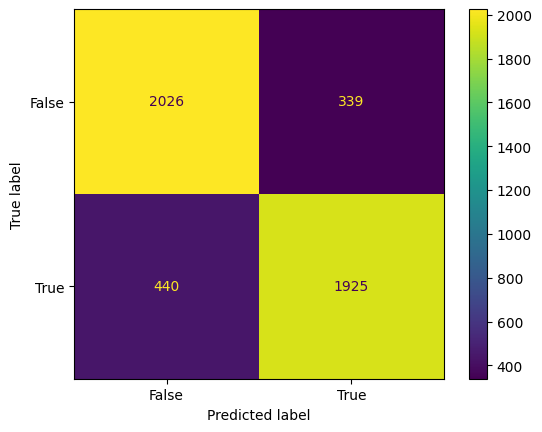

Accuracy : 0.8353065539112051
Recall : 0.813953488372093 Precision : 0.8502650176678446 f1 score : 0.8317131129833658
Kindle_Store_5 vs Books_5 

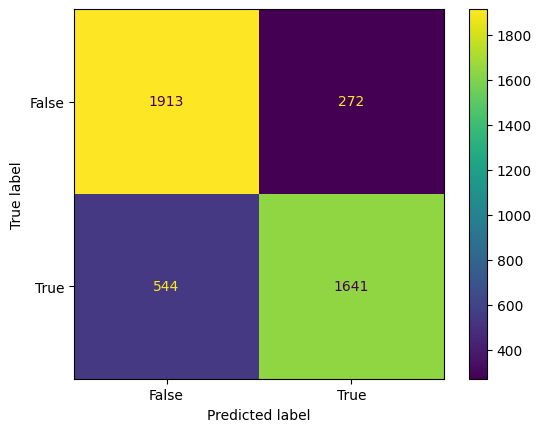

Accuracy : 0.8132723112128146
Recall : 0.7510297482837529 Precision : 0.8578149503397805 f1 score : 0.8008784773060029
Kindle_Store_5 vs Pet_Supplies_5 

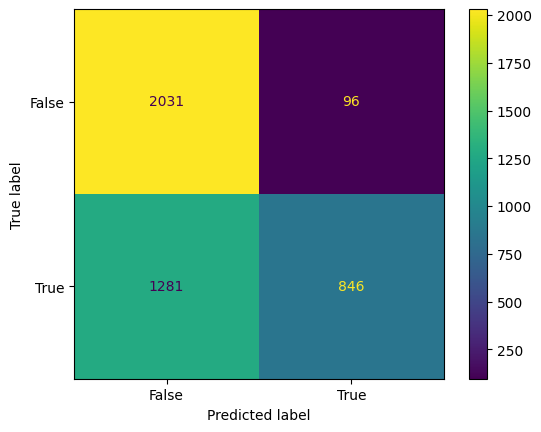

Accuracy : 0.6763046544428772
Recall : 0.39774330042313116 Precision : 0.8980891719745223 f1 score : 0.5513196480938416
Kindle_Store_5 vs Home_and_Kitchen_5 

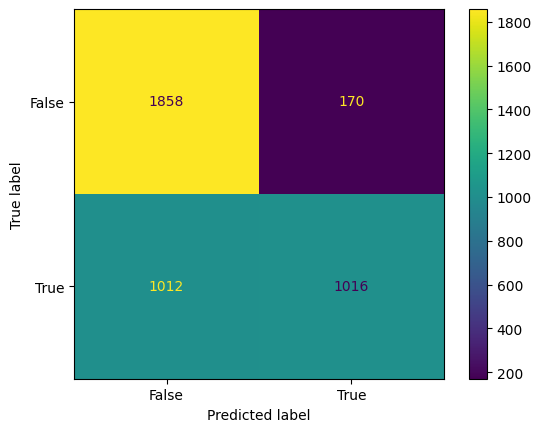

Accuracy : 0.7085798816568047
Recall : 0.5009861932938856 Precision : 0.8566610455311973 f1 score : 0.6322339763534536
Kindle_Store_5 vs Sports_and_Outdoors_5 

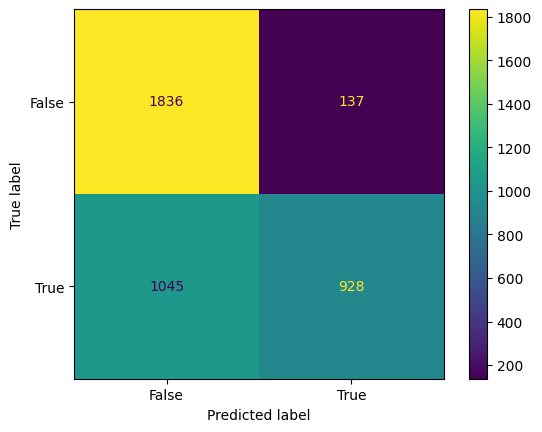

Accuracy : 0.7004561581348201
Recall : 0.4703497212366954 Precision : 0.8713615023474178 f1 score : 0.6109282422646478
Kindle_Store_5 vs Electronics_5 

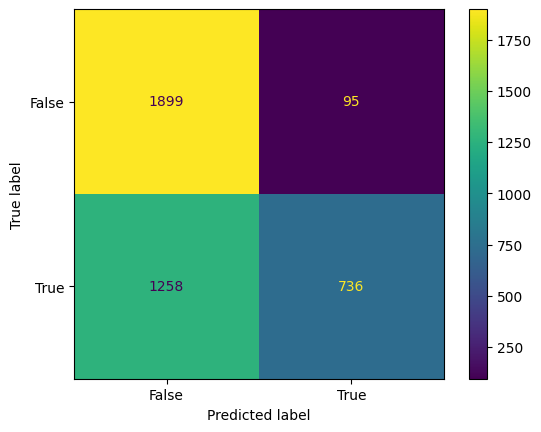

Accuracy : 0.6607321965897693
Recall : 0.3691073219658977 Precision : 0.8856799037304453 f1 score : 0.521061946902655
Books_5 vs Kindle_Store_5 

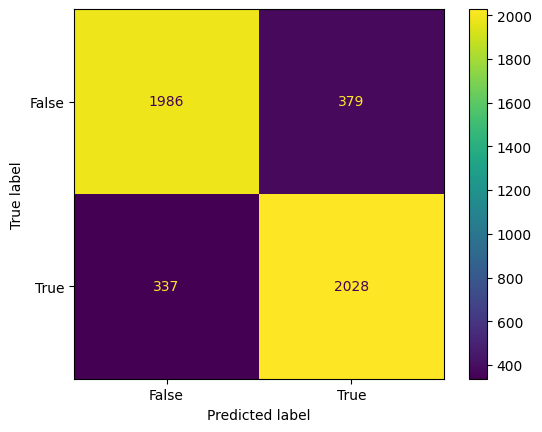

Accuracy : 0.8486257928118394
Recall : 0.8575052854122621 Precision : 0.8425425841296219 f1 score : 0.8499580888516345
Books_5 vs Books_5 

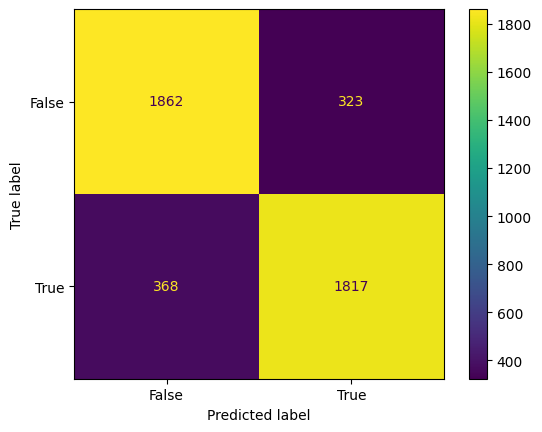

Accuracy : 0.8418764302059497
Recall : 0.8315789473684211 Precision : 0.8490654205607476 f1 score : 0.8402312138728323
Books_5 vs Pet_Supplies_5 

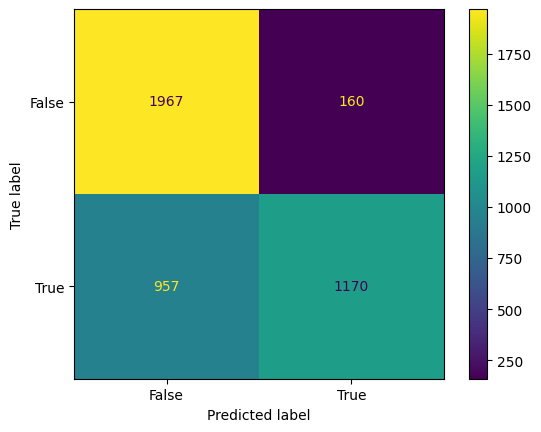

Accuracy : 0.737423601316408
Recall : 0.5500705218617772 Precision : 0.8796992481203008 f1 score : 0.6768874746890368
Books_5 vs Home_and_Kitchen_5 

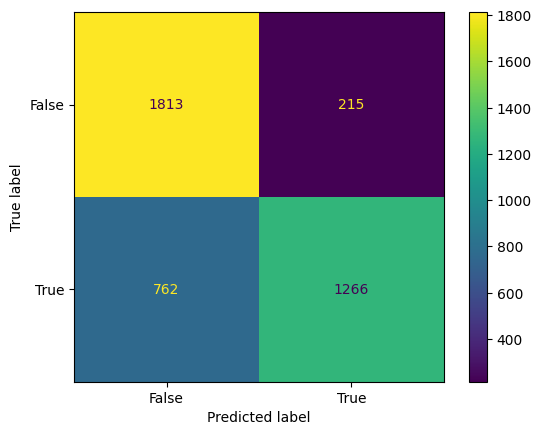

Accuracy : 0.7591222879684418
Recall : 0.6242603550295858 Precision : 0.8548278190411884 f1 score : 0.7215730977486463
Books_5 vs Sports_and_Outdoors_5 

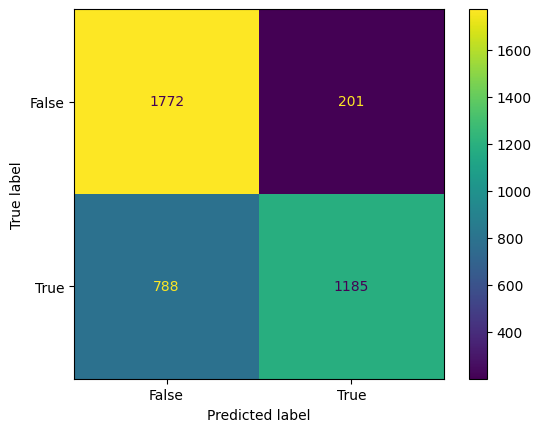

Accuracy : 0.7493664470349721
Recall : 0.6006082108464268 Precision : 0.854978354978355 f1 score : 0.70556713307532
Books_5 vs Electronics_5 

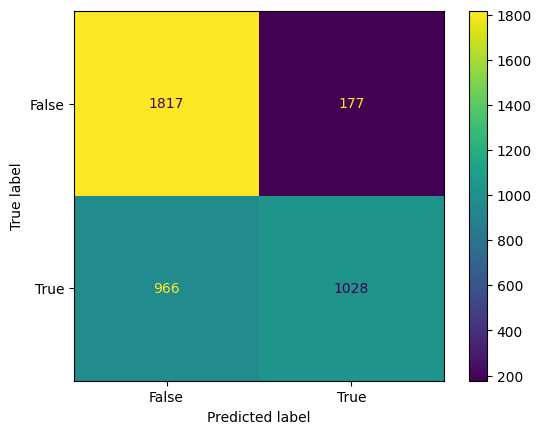

Accuracy : 0.7133901705115346
Recall : 0.5155466399197592 Precision : 0.8531120331950207 f1 score : 0.6427008440137543
Pet_Supplies_5 vs Kindle_Store_5 

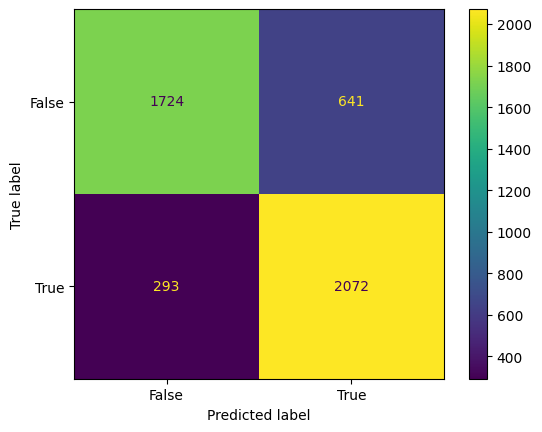

Accuracy : 0.8025369978858351
Recall : 0.8761099365750529 Precision : 0.7637301879837818 f1 score : 0.8160693186293816
Pet_Supplies_5 vs Books_5 

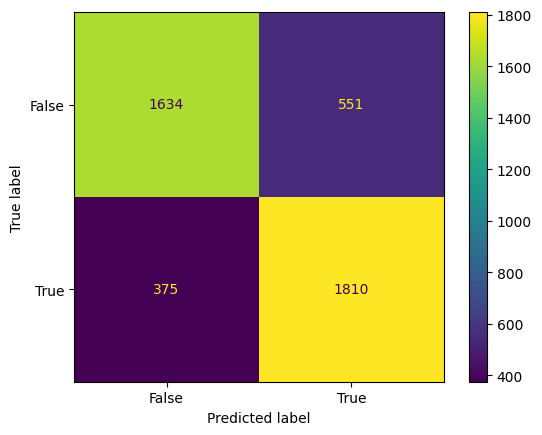

Accuracy : 0.7881006864988558
Recall : 0.8283752860411899 Precision : 0.7666243117323168 f1 score : 0.796304443466784
Pet_Supplies_5 vs Pet_Supplies_5 

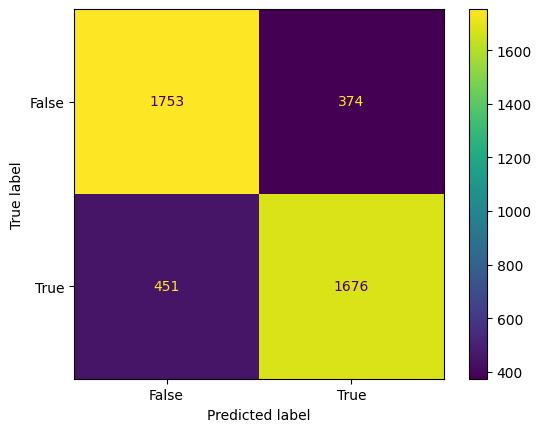

Accuracy : 0.806064880112835
Recall : 0.7879642689233662 Precision : 0.817560975609756 f1 score : 0.8024898252334212
Pet_Supplies_5 vs Home_and_Kitchen_5 

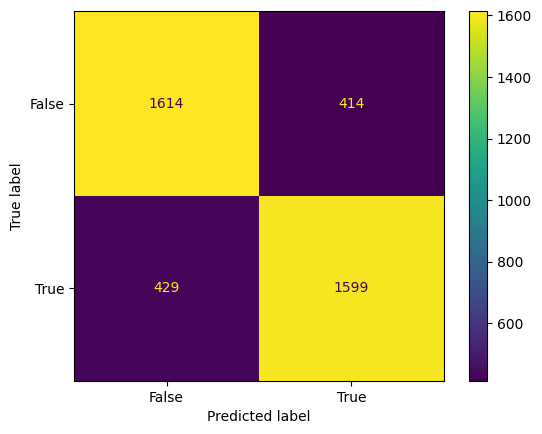

Accuracy : 0.7921597633136095
Recall : 0.7884615384615384 Precision : 0.7943368107302533 f1 score : 0.7913882702301409
Pet_Supplies_5 vs Sports_and_Outdoors_5 

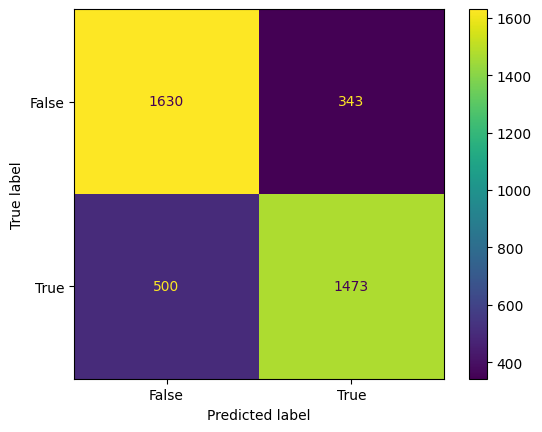

Accuracy : 0.7863659401926001
Recall : 0.7465788139888495 Precision : 0.8111233480176211 f1 score : 0.7775138558986541
Pet_Supplies_5 vs Electronics_5 

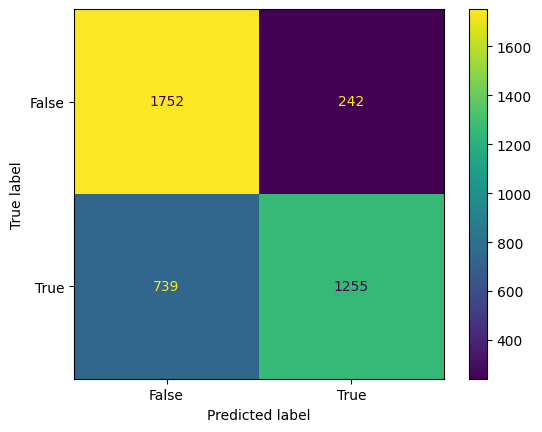

Accuracy : 0.754012036108325
Recall : 0.6293881644934805 Precision : 0.8383433533734135 f1 score : 0.7189916929246635
Home_and_Kitchen_5 vs Kindle_Store_5 

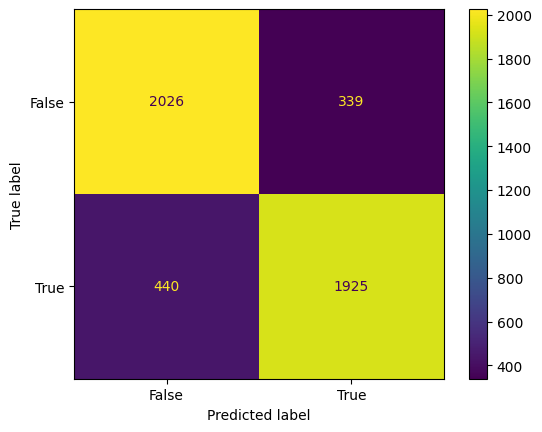

Accuracy : 0.8353065539112051
Recall : 0.813953488372093 Precision : 0.8502650176678446 f1 score : 0.8317131129833658
Home_and_Kitchen_5 vs Books_5 

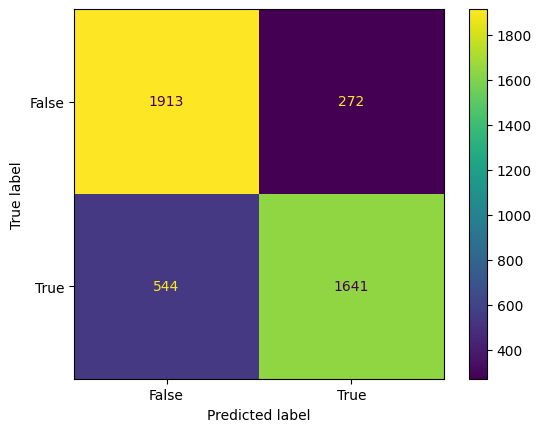

Accuracy : 0.8132723112128146
Recall : 0.7510297482837529 Precision : 0.8578149503397805 f1 score : 0.8008784773060029
Home_and_Kitchen_5 vs Pet_Supplies_5 

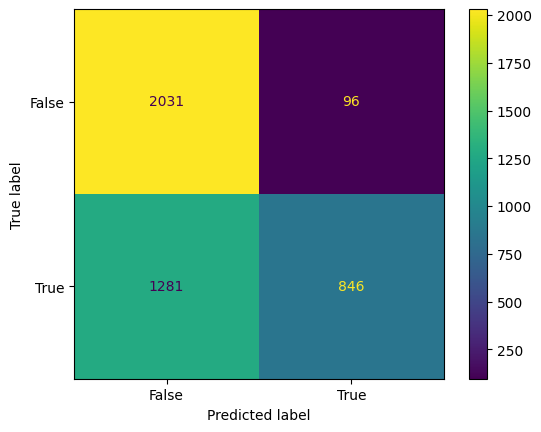

Accuracy : 0.6763046544428772
Recall : 0.39774330042313116 Precision : 0.8980891719745223 f1 score : 0.5513196480938416
Home_and_Kitchen_5 vs Home_and_Kitchen_5 

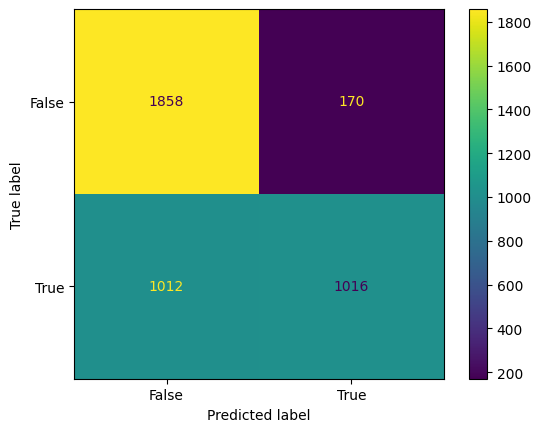

Accuracy : 0.7085798816568047
Recall : 0.5009861932938856 Precision : 0.8566610455311973 f1 score : 0.6322339763534536
Home_and_Kitchen_5 vs Sports_and_Outdoors_5 

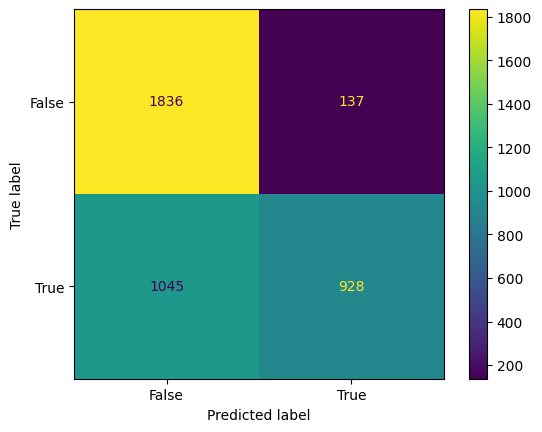

Accuracy : 0.7004561581348201
Recall : 0.4703497212366954 Precision : 0.8713615023474178 f1 score : 0.6109282422646478
Home_and_Kitchen_5 vs Electronics_5 

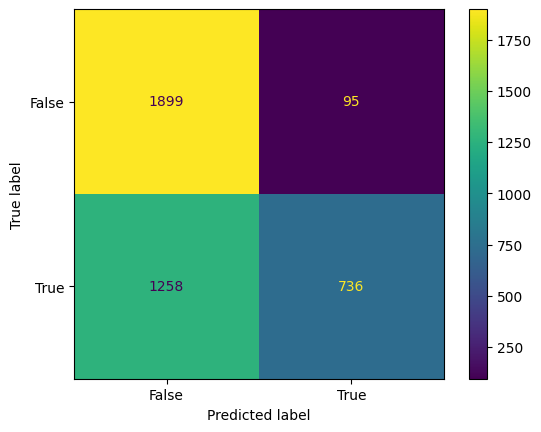

Accuracy : 0.6607321965897693
Recall : 0.3691073219658977 Precision : 0.8856799037304453 f1 score : 0.521061946902655
Sports_and_Outdoors_5 vs Kindle_Store_5 

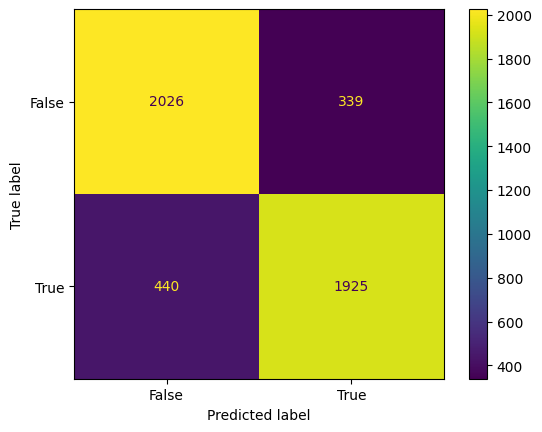

Accuracy : 0.8353065539112051
Recall : 0.813953488372093 Precision : 0.8502650176678446 f1 score : 0.8317131129833658
Sports_and_Outdoors_5 vs Books_5 

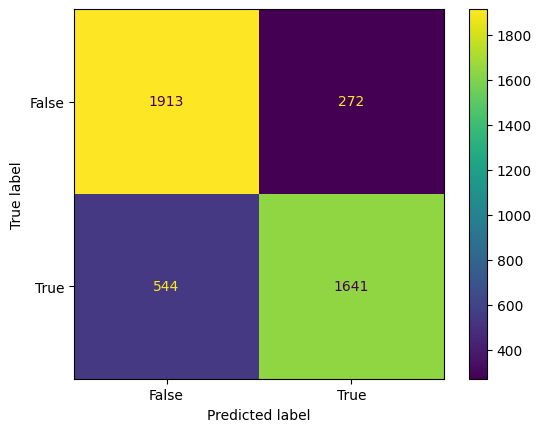

Accuracy : 0.8132723112128146
Recall : 0.7510297482837529 Precision : 0.8578149503397805 f1 score : 0.8008784773060029
Sports_and_Outdoors_5 vs Pet_Supplies_5 

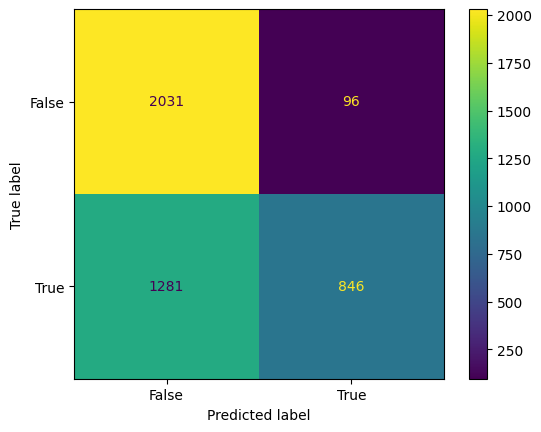

Accuracy : 0.6763046544428772
Recall : 0.39774330042313116 Precision : 0.8980891719745223 f1 score : 0.5513196480938416
Sports_and_Outdoors_5 vs Home_and_Kitchen_5 

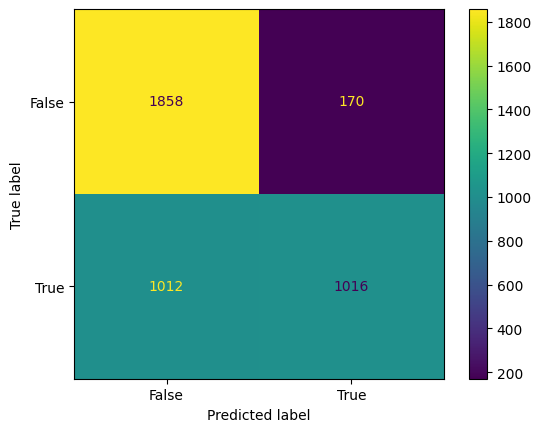

Accuracy : 0.7085798816568047
Recall : 0.5009861932938856 Precision : 0.8566610455311973 f1 score : 0.6322339763534536
Sports_and_Outdoors_5 vs Sports_and_Outdoors_5 

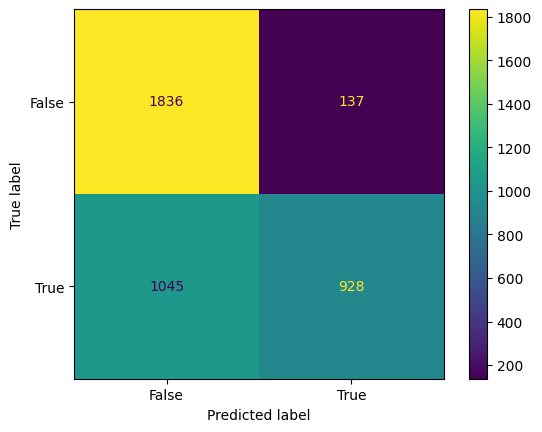

Accuracy : 0.7004561581348201
Recall : 0.4703497212366954 Precision : 0.8713615023474178 f1 score : 0.6109282422646478
Sports_and_Outdoors_5 vs Electronics_5 

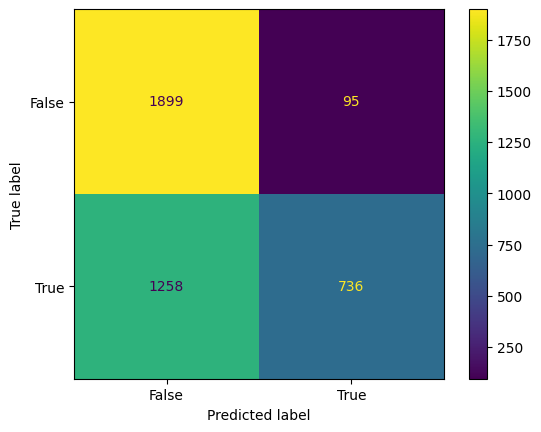

Accuracy : 0.6607321965897693
Recall : 0.3691073219658977 Precision : 0.8856799037304453 f1 score : 0.521061946902655
Electronics_5 vs Kindle_Store_5 

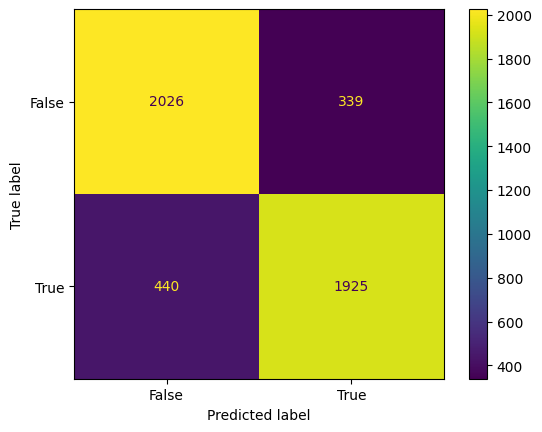

Accuracy : 0.8353065539112051
Recall : 0.813953488372093 Precision : 0.8502650176678446 f1 score : 0.8317131129833658
Electronics_5 vs Books_5 

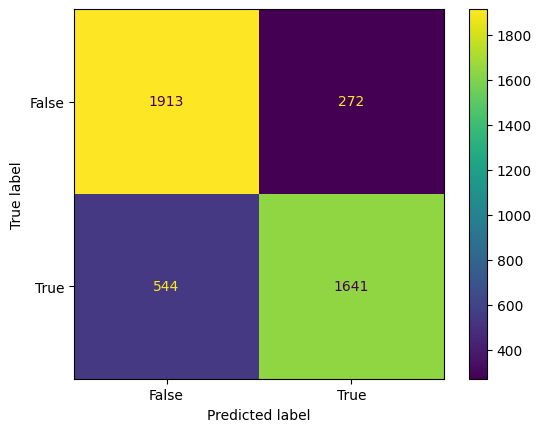

Accuracy : 0.8132723112128146
Recall : 0.7510297482837529 Precision : 0.8578149503397805 f1 score : 0.8008784773060029
Electronics_5 vs Pet_Supplies_5 

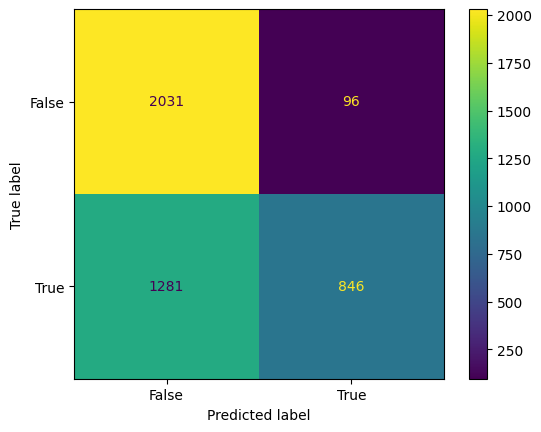

Accuracy : 0.6763046544428772
Recall : 0.39774330042313116 Precision : 0.8980891719745223 f1 score : 0.5513196480938416
Electronics_5 vs Home_and_Kitchen_5 

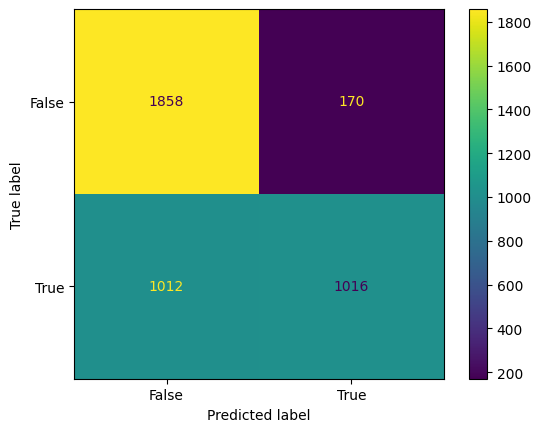

Accuracy : 0.7085798816568047
Recall : 0.5009861932938856 Precision : 0.8566610455311973 f1 score : 0.6322339763534536
Electronics_5 vs Sports_and_Outdoors_5 

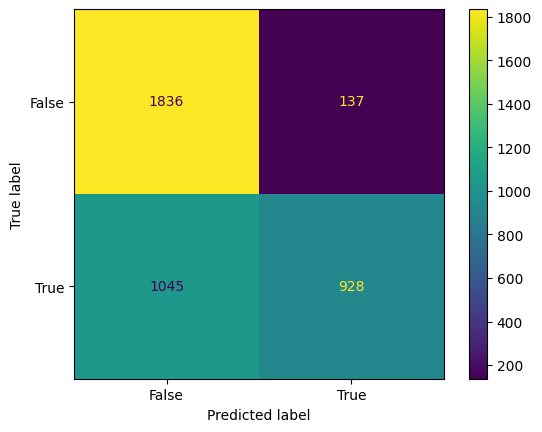

Accuracy : 0.7004561581348201
Recall : 0.4703497212366954 Precision : 0.8713615023474178 f1 score : 0.6109282422646478
Electronics_5 vs Electronics_5 

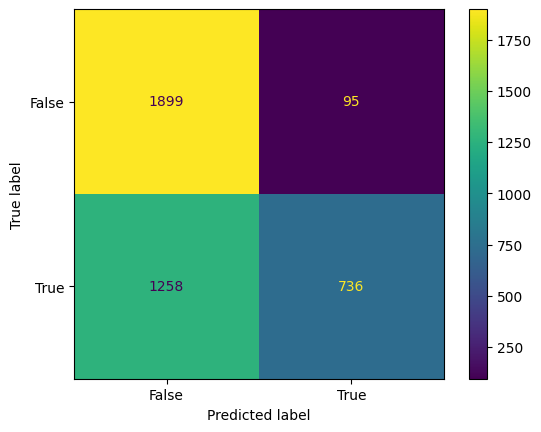

Accuracy : 0.6607321965897693
Recall : 0.3691073219658977 Precision : 0.8856799037304453 f1 score : 0.521061946902655


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy
domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']
results=[[{} for x in range(6)] for y in range(6)]
for j in range(6):
  y_predicted=[];
  for i in range(6):
    y_predicted.append( numpy.genfromtxt('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/'+domains[j]+" vs "+domains[i]+'.csv', dtype=float, delimiter=","))
    
    # print("\n",y_predicted)
    y_predicted[i] = numpy.where(y_predicted[i] > 0.5, 1, 0)
    # print("\n\n\n\n")
    print(domains[j]+" vs "+domains[i] , end =" ");
    # print(y_test[i].shape,y_predicted[i].shape)

    confusion_matrix = metrics.confusion_matrix(y_test[i], y_predicted[i])

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    results[j][i]['Accuracy']=accuracy_score(y_test[i], y_predicted[i])
    results[j][i]['Recall']=recall_score(y_test[i], y_predicted[i])
    results[j][i]['Precision']= precision_score(y_test[i], y_predicted[i])
    results[j][i]['f1 score']= f1_score(y_test[i], y_predicted[i])
    print('Accuracy :', accuracy_score(y_test[i], y_predicted[i]))
    print('Recall :', recall_score(y_test[i], y_predicted[i]),end=" ")
    print('Precision :', precision_score(y_test[i], y_predicted[i]),end=" ")
    print('f1 score :', f1_score(y_test[i], y_predicted[i]))


Results


In [ ]:

# printing accuracy
print('Accuracies')
print("                     ",end=" ")
domains=['    Kindle_Store ','         Books_5 ','    Pet_Supplies   ','    Home_and_Kitchen  ','Sports_and_Outdoors ','  Electronics ']
for x in domains:
  print(x,end=" ")
# print(domains)
print()
for x in range(6):
  print(domains[x],end=(' '*(22-len(domains[x]))));
  for y in results[x]:
    print(y['Accuracy'],end="  ")
  print()

print()
# printing Recall
print('Recall')
print("                     ",end=" ")
domains=['    Kindle_Store ','         Books_5 ','    Pet_Supplies   ','    Home_and_Kitchen  ','Sports_and_Outdoors ','  Electronics ']
for x in domains:
  print(x,end=" ")
# print(domains)
print()
for x in range(6):
  print(domains[x],end=(' '*(22-len(domains[x]))));
  for y in results[x]:
    print(y['Recall'],end="  ")
  print()

print()
# printing Precision
print('Precision')
print("                     ",end=" ")
domains=['    Kindle_Store ','         Books_5 ','    Pet_Supplies   ','    Home_and_Kitchen  ','Sports_and_Outdoors ','  Electronics ']
for x in domains:
  print(x,end=" ")
# print(domains)
print()
for x in range(6):
  print(domains[x],end=(' '*(22-len(domains[x]))));
  for y in results[x]:
    print(y['Precision'],end="  ")
  print()

print()
# printing f1 score
print()
print('f1 score')
print("                     ",end=" ")
domains=['    Kindle_Store ','         Books_5 ','    Pet_Supplies   ','    Home_and_Kitchen  ','Sports_and_Outdoors ','  Electronics ']
for x in domains:
  print(x,end=" ")
# print(domains)
print()
for x in range(6):
  print(domains[x],end=(' '*(22-len(domains[x]))));
  for y in results[x]:
    print(y['f1 score'],end=" ")
  print()

Accuracies
                          Kindle_Store           Books_5      Pet_Supplies        Home_and_Kitchen   Sports_and_Outdoors    Electronics  
    Kindle_Store      0.8353065539112051  0.8132723112128146  0.6763046544428772  0.7085798816568047  0.7004561581348201  0.6607321965897693  
         Books_5      0.8486257928118394  0.8418764302059497  0.737423601316408  0.7591222879684418  0.7493664470349721  0.7133901705115346  
    Pet_Supplies      0.8025369978858351  0.7881006864988558  0.806064880112835  0.7921597633136095  0.7863659401926001  0.754012036108325  
    Home_and_Kitchen  0.8353065539112051  0.8132723112128146  0.6763046544428772  0.7085798816568047  0.7004561581348201  0.6607321965897693  
Sports_and_Outdoors   0.8353065539112051  0.8132723112128146  0.6763046544428772  0.7085798816568047  0.7004561581348201  0.6607321965897693  
  Electronics         0.8353065539112051  0.8132723112128146  0.6763046544428772  0.7085798816568047  0.7004561581348201  0.660732196589769

<ipython-input-22-ee7065235de7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+domains,fontsize=5)
<ipython-input-22-ee7065235de7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+domains,fontsize=8)


[[{'Accuracy': 0.8238900634249472, 'Recall': 0.760676532769556, 'Precision': 0.8707647628267183, 'f1 score': 0.812006319115324}, {'Accuracy': 0.7963386727688787, 'Recall': 0.6887871853546911, 'Precision': 0.8775510204081632, 'f1 score': 0.7717948717948718}, {'Accuracy': 0.6443347437705689, 'Recall': 0.3168782322519981, 'Precision': 0.9182561307901907, 'f1 score': 0.47116392869626006}, {'Accuracy': 0.6770216962524654, 'Recall': 0.40384615384615385, 'Precision': 0.8902173913043478, 'f1 score': 0.5556309362279511}, {'Accuracy': 0.6705524581855044, 'Recall': 0.3816523061327927, 'Precision': 0.9039615846338536, 'f1 score': 0.5367070563079116}, {'Accuracy': 0.6268806419257773, 'Recall': 0.279839518555667, 'Precision': 0.9147540983606557, 'f1 score': 0.42857142857142855}], [{'Accuracy': 0.8257928118393235, 'Recall': 0.8439746300211417, 'Precision': 0.8143614851081191, 'f1 score': 0.8289036544850499}, {'Accuracy': 0.8137299771167048, 'Recall': 0.7890160183066361, 'Precision': 0.830043331728454

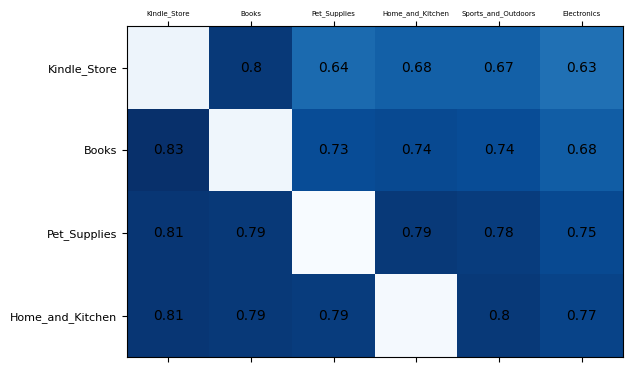

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

min_val, max_val = 0, 6
intersection_matrix = np.random.randint(0, 10, size=(4,6))

for i in range(6):
    for j in range(4):
        # print(i,j)
        intersection_matrix[j][i] = int(results[j][i]['Accuracy'])
        # print(c)
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

domains=['Kindle_Store_5','Books_5','Pet_Supplies_5','Home_and_Kitchen_5','Sports_and_Outdoors_5','Electronics_5']
print(results)
for i in range(6):
    for j in range(4):
        # print(i,j)
        # c = domains[j] + " -> " + domains[i]

        # print(c)
        ax.text(i, j, str(round((results[j][i]['Accuracy']),2)), va='center', ha='center')

In [ ]:

# model.save('/content/drive/MyDrive/CrossDomain_FakeReviewDetection/Datasets/my_model.keras')
import numpy as np
print(y_predicted[0].shape)
y_predicted = np.vstack(y_predicted).flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
print(y_predicted)

In [ ]:
y_predicted2 = np.vstack(y_predicted2).flatten()
y_predicted2 = np.where(y_predicted2 > 0.5, 1, 0)
print(y_predicted2)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(y_test.shape,y_predicted.shape)

confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Accuracy :', accuracy_score(y_test, y_predicted))
print('Recall :', recall_score(y_test, y_predicted))
print('Precision :', precision_score(y_test, y_predicted))
print('f1 score :', f1_score(y_test, y_predicted))

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test2, y_predicted2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print('Accuracy :', accuracy_score(y_test2, y_predicted2))
print('Recall :', recall_score(y_test2, y_predicted2))
print('Precision :', precision_score(y_test2, y_predicted2))
print('f1 score :', f1_score(y_test2, y_predicted2))

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df3['text_'],df3['spam'], stratify=df3['spam'])
y_predicted3 = model.predict(x_test3)

In [ ]:
y_predicted3 = y_predicted3.flatten()
y_predicted3 = np.where(y_predicted3 > 0.5, 1, 0)
print(y_predicted3)

confusion_matrix = metrics.confusion_matrix(y_test3, y_predicted3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Accuracy :', accuracy_score(y_test3, y_predicted3))
print('Recall :', recall_score(y_test3, y_predicted3))
print('Precision :', precision_score(y_test3, y_predicted3))
print('f1 score :', f1_score(y_test3, y_predicted3))